# **MUSHROOM DATASET**

![alt text](https://drive.google.com/uc?id=1Pze8_sUdHXWnf1rrq2QSklKFCEGiOTa5)

# **Data description:**

There are a total of 8124 instances.

22 features and 1 target(namely "class")

     1. cap-shape:                bell=b,conical=c,convex=x,flat=f,
                                  knobbed=k,sunken=s
     2. cap-surface:              fibrous=f,grooves=g,scaly=y,smooth=s
     3. cap-color:                brown=n,buff=b,cinnamon=c,gray=g,green=r,
                                  pink=p,purple=u,red=e,white=w,yellow=y
     4. bruises?:                 bruises=t,no=f
     5. odor:                     almond=a,anise=l,creosote=c,fishy=y,foul=f,
                                  musty=m,none=n,pungent=p,spicy=s
     6. gill-attachment:          attached=a,descending=d,free=f,notched=n
     7. gill-spacing:             close=c,crowded=w,distant=d
     8. gill-size:                broad=b,narrow=n
     9. gill-color:               black=k,brown=n,buff=b,chocolate=h,gray=g,
                                  green=r,orange=o,pink=p,purple=u,red=e,
                                  white=w,yellow=y
    10. stalk-shape:              enlarging=e,tapering=t
    11. stalk-root:               bulbous=b,club=c,cup=u,equal=e,
                                  rhizomorphs=z,rooted=r,missing=?
    12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
    13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
    14. stalk-color-above-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
                                  pink=p,red=e,white=w,yellow=y
    15. stalk-color-below-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
                                  pink=p,red=e,white=w,yellow=y
    16. veil-type:                partial=p,universal=u
    17. veil-color:               brown=n,orange=o,white=w,yellow=y
    18. ring-number:              none=n,one=o,two=t
    19. ring-type:                cobwebby=c,evanescent=e,flaring=f,large=l,
                                  none=n,pendant=p,sheathing=s,zone=z
    20. spore-print-color:        black=k,brown=n,buff=b,chocolate=h,green=r,
                                  orange=o,purple=u,white=w,yellow=y
    21. population:               abundant=a,clustered=c,numerous=n,
                                  scattered=s,several=v,solitary=y
    22. habitat:                  grasses=g,leaves=l,meadows=m,paths=p,
                                  urban=u,waste=w,woods=d

    classes: edible=e, poisonous=p

Hence the dataset turns out to be a classification dataset.

Algorithms applied here are:

-> kNN

-> logistic regression

-> nueral networks


Based upon the features, model tries to predict whether the mushroom is edible or poisoness. 

# importing libraries

In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,LabelBinarizer
from sklearn.decomposition import PCA
from tqdm import tqdm_notebook
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

loading data

In [0]:
data=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data",names=["class","cap-shape","cap-surface","cap-color","bruises?","odor","gill-attachment","gill-spacing","gill-size","gill-color","stalk-shape","stalk-root","stalk-surface-above-ring","stalk-surface-below-ring","stalk-color-above-ring","stalk-color-below-ring","veil-type","veil-color","ring-number","ring-type","spore-print-color","population","habitat"])

In [0]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


Data is in the form of alphabets in attributes, hence data needs to be converted into numbers as computer only understands numbers.

# Data preprocessing and cleaning

checking for any null values

In [0]:
pd.isnull(data).sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises?                    0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

no null values found

In [0]:
data["stalk-root"].value_counts()

b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

In "stalk-root" attribute/feature there are missing values rplaced by '?'

Hence missing values must be removed by separating it out into a separate column and dropping that column.

The get_dummies() function is used to convert categorical variable into dummy/indicator variables.
get_dummies() is a pandas library function.
get_dummies() separates  all the unique categorical values and converts into binary data by separating it out into separate columns.

In [0]:
encoded_data = pd.get_dummies(data)

encoded_data.head(5)

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises?_f,bruises?_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,...,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-type_p,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


There are 2 targets "class_e" and "class_p".

"class_e" 

'veil-type' feature has NaN value after correlation as whole column of 'veil-type' is 1.Therefore it will not help classifying mushrooms in any manner.
Hence 'veil-type_p'(after get_dummies() veil-type is changed to veil-type_p) and 'stalk-root_?' (as discussed earlier) features need to be dropped.

In [0]:
#dropping veil-type as it is NaN
encoded_data=encoded_data.drop(columns=["veil-type_p","stalk-root_?"])

In [0]:
len(encoded_data.columns)

117

# Data Visualisation 

Visualising Target

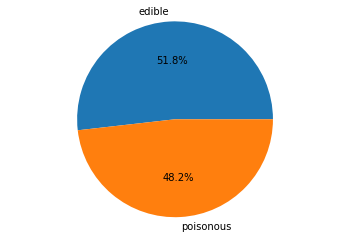

In [0]:
labels = ['edible','poisonous']
a,b=0,0
for i in data["class"].values:
  if i=='e':
    a+=1
  else:
    b+=1
size=[a,b]
plt.pie(size , labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.show()


from the pie chart it is clear that there are 51.8% edible and 48.2% poisonous mushrooms in the dataset.

Both being 50% would have been a better scenario otherwise output will be biased towards edible mushrooms.

As the difference is not much and closer to 50% , we are good to go !!

**4208 edible**
**& 3916 poisonous mushrooms**

**visualising all features against targets(class_e & class_p)**



(-1.100202665628139,
 1.1000096508166153,
 -1.101126139777739,
 1.1003922374683937)

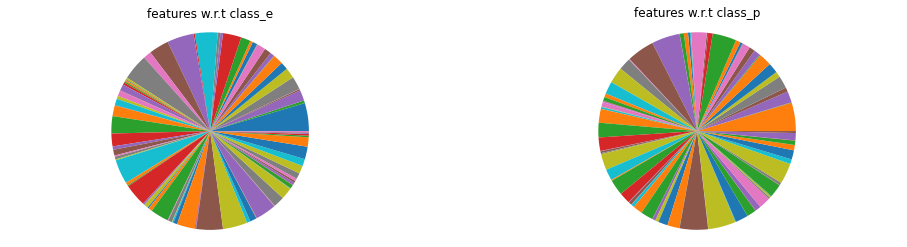

In [0]:
#code for pie chart for all features vs class_e(edible mushrooms)
plt.figure(figsize=(16,4))
labels = encoded_data.columns
size=[]
sum=0
for cols in encoded_data.columns:
  for i,val in enumerate(encoded_data[cols].values):
    t=encoded_data["class_e"].values[i]
    if (val == t) and (val==1):
      sum+=1
  size.append(sum)
  sum=0
plt.subplot(1,2,1)
plt.pie(size)
plt.title('features w.r.t class_e')
plt.axis('equal')

#code for pie chart for all features vs class_p(poisonous mushrooms)
sizep=[]
sump=0
for cols in encoded_data.columns:
  for i,val in enumerate(encoded_data[cols].values):
    t=encoded_data["class_p"].values[i]
    if (val == t) and (val==1):
      sump+=1
  sizep.append(sump)
  sump=0
plt.subplot(1,2,2)
plt.pie(sizep)
plt.title('features w.r.t class_p')
plt.axis('equal')

Visualising all 21 features with targets(class_e and class_p)

code for visualsing all 21 features is written

each feature is plotted for edible as well as poisonous mushroom in order to get a better look how features are effecting target.

Scroll down a lot to see the graphs !!

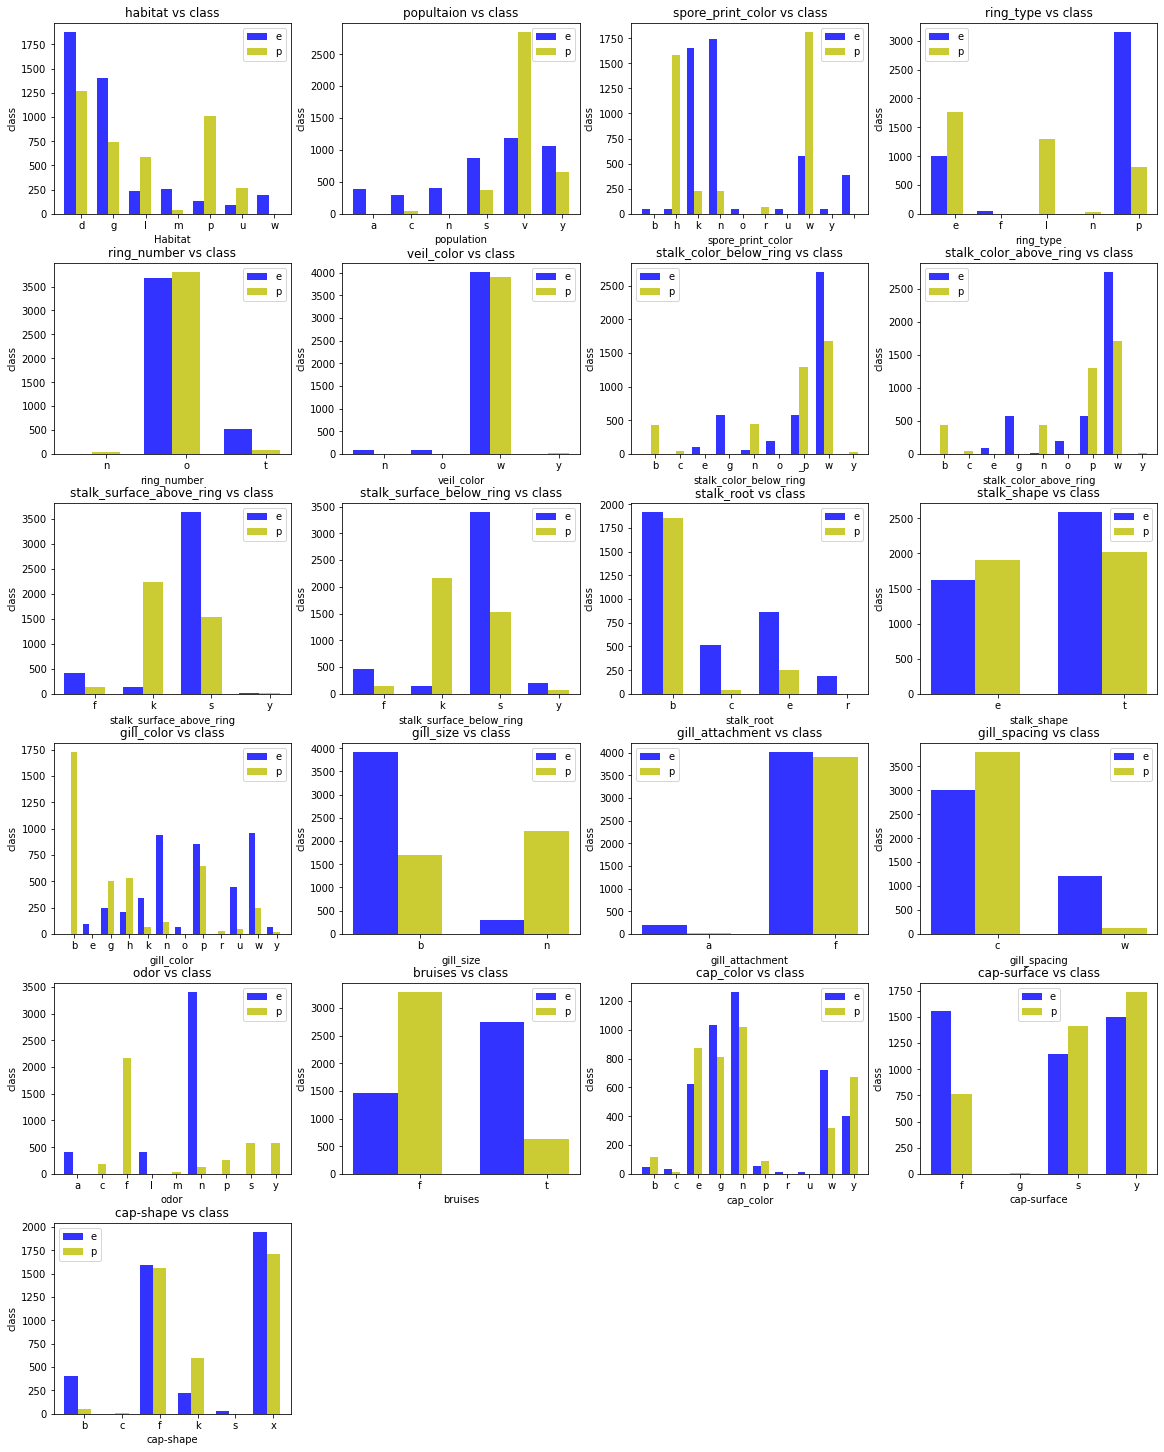

In [0]:
fig=plt.figure(figsize=(16,20))

# data to plot 
means_frank = (1880, 1408, 240, 256, 136, 96, 192)  #just a variable
means_guido = (1268, 740, 592, 36, 1008, 272, 0)    #just a variable
n_groups = len(means_frank)
# create plot
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
plt.subplot(6,4,1)
rects1 = plt.bar(index, means_frank, bar_width,alpha=opacity,color='b',label='e')
rects2 = plt.bar(index + bar_width, means_guido, bar_width,alpha=opacity,color='y',label='p')
plt.xlabel('Habitat')
plt.ylabel('class')
plt.title('habitat vs class')
plt.xticks(index + bar_width, ('d',
       'g', 'l', 'm', 'p', 'u',
       'w'))
plt.legend()


# data to plot 
means_frank = (384, 288, 400, 880, 1192, 1064)
means_guido = (0, 52, 0, 368, 2848, 648)
n_groups = len(means_frank)
# create plot
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
plt.subplot(6,4,2)
rects1 = plt.bar(index, means_frank, bar_width,alpha=opacity,color='b',label='e')
rects2 = plt.bar(index + bar_width, means_guido, bar_width,alpha=opacity,color='y',label='p')
plt.xlabel('population')
plt.ylabel('class')
plt.title('popultaion vs class')
plt.xticks(index + bar_width, ('a', 'c', 'n', 's',
       'v', 'y'))
plt.legend()


# data to plot 
means_frank = ( 48, 48, 1648, 1744, 48, 0, 48, 576, 48, 384)
means_guido = (0, 1584, 224, 224, 0, 72, 0, 1812, 0, 0)
n_groups = len(means_frank)
# create plot
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
plt.subplot(6,4,3)
rects1 = plt.bar(index, means_frank, bar_width,alpha=opacity,color='b',label='e')
rects2 = plt.bar(index + bar_width, means_guido, bar_width,alpha=opacity,color='y',label='p')
plt.xlabel('spore_print_color')
plt.ylabel('class')
plt.title('spore_print_color vs class')
plt.xticks(index + bar_width, ('b', 'h', 'k',
        'n','o', 'r',
        'u', 'w', 'y'))
plt.legend()

# data to plot 
means_frank = ( 1008, 48, 0, 0, 3152)
means_guido = ( 1768, 0, 1296, 36, 816)
n_groups = len(means_frank)
# create plot
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
plt.subplot(6,4,4)
rects1 = plt.bar(index, means_frank, bar_width,alpha=opacity,color='b',label='e')
rects2 = plt.bar(index + bar_width, means_guido, bar_width,alpha=opacity,color='y',label='p')
plt.xlabel('ring_type')
plt.ylabel('class')
plt.title('ring_type vs class')
plt.xticks(index + bar_width, ('e', 'f', 'l',
       'n', 'p'))
plt.legend()

#5
# data to plot 
means_frank = (0, 3680, 528)
means_guido = (36, 3808, 72)
n_groups = len(means_frank)
# create plot
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
plt.subplot(6,4,5)
rects1 = plt.bar(index, means_frank, bar_width,alpha=opacity,color='b',label='e')
rects2 = plt.bar(index + bar_width, means_guido, bar_width,alpha=opacity,color='y',label='p')
plt.xlabel('ring_number')
plt.ylabel('class')
plt.title('ring_number vs class')
plt.xticks(index + bar_width, ('n', 'o',
       't'))
plt.legend()

#6
# data to plot 
means_frank = (96, 96, 4016, 0)
means_guido = (0, 0, 3908, 8)
n_groups = len(means_frank)
# create plot
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
plt.subplot(6,4,6)
rects1 = plt.bar(index, means_frank, bar_width,alpha=opacity,color='b',label='e')
rects2 = plt.bar(index + bar_width, means_guido, bar_width,alpha=opacity,color='y',label='p')
plt.xlabel('veil_color')
plt.ylabel('class')
plt.title('veil_color vs class')
plt.xticks(index + bar_width, ('n',
        'o', 'w', 'y'))
plt.legend()

#7
# data to plot 
means_frank = (0, 0, 96, 576, 64, 192, 576, 2704, 0)
means_guido = (432, 36, 0, 0, 448, 0, 1296, 1680, 24)
n_groups = len(means_frank)
# create plot
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
plt.subplot(6,4,7)
rects1 = plt.bar(index, means_frank, bar_width,alpha=opacity,color='b',label='e')
rects2 = plt.bar(index + bar_width, means_guido, bar_width,alpha=opacity,color='y',label='p')
plt.xlabel('stalk_color_below_ring')
plt.ylabel('class')
plt.title('stalk_color_below_ring vs class')
plt.xticks(index + bar_width, ('b',
       'c', 'e',
       'g', 'n',
       'o', '_p',
       'w', 'y'))
plt.legend()

#8
# data to plot 
means_frank = ( 0, 0, 96, 576, 16, 192, 576, 2752, 0)
means_guido = (432, 36, 0, 0, 432, 0, 1296, 1712, 8)
n_groups = len(means_frank)
# create plot
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
plt.subplot(6,4,8)
rects1 = plt.bar(index, means_frank, bar_width,alpha=opacity,color='b',label='e')
rects2 = plt.bar(index + bar_width, means_guido, bar_width,alpha=opacity,color='y',label='p')
plt.xlabel('stalk_color_above_ring')
plt.ylabel('class')
plt.title('stalk_color_above_ring vs class')
plt.xticks(index + bar_width, ('b', 'c',
       'e', 'g',
       'n', 'o',
       'p', 'w',
       'y'))
plt.legend()

#9
# data to plot 
means_frank = (408, 144, 3640, 16)
means_guido = (144, 2228, 1536, 8)
n_groups = len(means_frank)
# create plot
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
plt.subplot(6,4,9)
rects1 = plt.bar(index, means_frank, bar_width,alpha=opacity,color='b',label='e')
rects2 = plt.bar(index + bar_width, means_guido, bar_width,alpha=opacity,color='y',label='p')
plt.xlabel('stalk_surface_above_ring')
plt.ylabel('class')
plt.title('stalk_surface_above_ring vs class')
plt.xticks(index + bar_width, ('f',
       'k', 's',
       'y'))
plt.legend()


#10
# data to plot 
means_frank = (456, 144, 3400, 208)
means_guido = (144, 2160, 1536, 76)
n_groups = len(means_frank)
# create plot
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
plt.subplot(6,4,10)
rects1 = plt.bar(index, means_frank, bar_width,alpha=opacity,color='b',label='e')
rects2 = plt.bar(index + bar_width, means_guido, bar_width,alpha=opacity,color='y',label='p')
plt.xlabel('stalk_surface_below_ring')
plt.ylabel('class')
plt.title('stalk_surface_below_ring vs class')
plt.xticks(index + bar_width, ('f',
       'k', 's',
       'y'))
plt.legend()


#11
# data to plot 
means_frank = ( 1920, 512, 864, 192)
means_guido = (1856, 44, 256, 0)
n_groups = len(means_frank)
# create plot
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
plt.subplot(6,4,11)
rects1 = plt.bar(index, means_frank, bar_width,alpha=opacity,color='b',label='e')
rects2 = plt.bar(index + bar_width, means_guido, bar_width,alpha=opacity,color='y',label='p')
plt.xlabel('stalk_root')
plt.ylabel('class')
plt.title('stalk_root vs class')
plt.xticks(index + bar_width, ('b','c','e','r'))
plt.legend()

#12
# data to plot 
means_frank = ( 1616, 2592)
means_guido = (1900, 2016)
n_groups = len(means_frank)
# create plot
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
plt.subplot(6,4,12)
rects1 = plt.bar(index, means_frank, bar_width,alpha=opacity,color='b',label='e')
rects2 = plt.bar(index + bar_width, means_guido, bar_width,alpha=opacity,color='y',label='p')
plt.xlabel('stalk_shape')
plt.ylabel('class')
plt.title('stalk_shape vs class')
plt.xticks(index + bar_width, ('e', 't'))
plt.legend()

#13

# data to plot 
means_frank = ( 0, 96, 248, 204, 344, 936, 64, 852, 0, 444, 956, 64)
means_guido = (1728, 0, 504, 528, 64, 112, 0, 640, 24, 48, 246, 22)
n_groups = len(means_frank)
# create plot
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
plt.subplot(6,4,13)
rects1 = plt.bar(index, means_frank, bar_width,alpha=opacity,color='b',label='e')
rects2 = plt.bar(index + bar_width, means_guido, bar_width,alpha=opacity,color='y',label='p')
plt.xlabel('gill_color')
plt.ylabel('class')
plt.title('gill_color vs class')
plt.xticks(index + bar_width, ('b', 'e', 'g', 'h',
       'k', 'n', 'o', 'p',
       'r', 'u', 'w', 'y',))
plt.legend()

#14
# data to plot 
means_frank = (3920, 288)
means_guido = (1692, 2224)
n_groups = len(means_frank)
# create plot
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
plt.subplot(6,4,14)
rects1 = plt.bar(index, means_frank, bar_width,alpha=opacity,color='b',label='e')
rects2 = plt.bar(index + bar_width, means_guido, bar_width,alpha=opacity,color='y',label='p')
plt.xlabel('gill_size')
plt.ylabel('class')
plt.title('gill_size vs class')
plt.xticks(index + bar_width, ('b','n'))
plt.legend()


#15

# data to plot 
means_frank = (192, 4016)
means_guido = (18, 3898)
n_groups = len(means_frank)
# create plot
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
plt.subplot(6,4,15)
rects1 = plt.bar(index, means_frank, bar_width,alpha=opacity,color='b',label='e')
rects2 = plt.bar(index + bar_width, means_guido, bar_width,alpha=opacity,color='y',label='p')
plt.xlabel('gill_attachment')
plt.ylabel('class')
plt.title('gill_attachment vs class')
plt.xticks(index + bar_width, ('a','f'))
plt.legend()

#16
# data to plot 
means_frank = (3008, 1200)
means_guido = (3804, 112)
n_groups = len(means_frank)
# create plot
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
plt.subplot(6,4,16)
rects1 = plt.bar(index, means_frank, bar_width,alpha=opacity,color='b',label='e')
rects2 = plt.bar(index + bar_width, means_guido, bar_width,alpha=opacity,color='y',label='p')
plt.xlabel('gill_spacing')
plt.ylabel('class')
plt.title('gill_spacing vs class')
plt.xticks(index + bar_width, ('c', 'w'))
plt.legend()

#17
# data to plot 
means_frank = (400, 0, 0, 400, 0, 3408, 0, 0, 0)
means_guido = ( 0, 192, 2160, 0, 36, 120, 256, 576, 576)
n_groups = len(means_frank)
# create plot
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
plt.subplot(6,4,17)
rects1 = plt.bar(index, means_frank, bar_width,alpha=opacity,color='b',label='e')
rects2 = plt.bar(index + bar_width, means_guido, bar_width,alpha=opacity,color='y',label='p')
plt.xlabel('odor')
plt.ylabel('class')
plt.title('odor vs class')
plt.xticks(index + bar_width, ('a',
       'c', 'f', 'l', 'm', 'n', 'p', 's',
       'y'))
plt.legend()

#18
# data to plot 
means_frank = (1456, 2752)
means_guido = (3292, 624)
n_groups = len(means_frank)
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
plt.subplot(6,4,18)
rects1 = plt.bar(index, means_frank, bar_width,alpha=opacity,color='b',label='e')
rects2 = plt.bar(index + bar_width, means_guido, bar_width,alpha=opacity,color='y',label='p')
plt.xlabel('bruises')
plt.ylabel('class')
plt.title('bruises vs class')
plt.xticks(index + bar_width, ('f','t'))
plt.legend()

#19
# data to plot 
means_frank = (48, 32, 624, 1032, 1264, 56, 16, 16, 720, 400)
means_guido = (120, 12, 876, 808, 1020, 88, 0, 0, 320, 672)
n_groups = len(means_frank)
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
plt.subplot(6,4,19)
rects1 = plt.bar(index, means_frank, bar_width,alpha=opacity,color='b',label='e')

rects2 = plt.bar(index + bar_width, means_guido, bar_width,alpha=opacity,color='y',label='p')

plt.xlabel('cap_color')
plt.ylabel('class')
plt.title('cap_color vs class')
plt.xticks(index + bar_width, ('b', 'c',
       'e', 'g', 'n', 'p',
       'r', 'u', 'w', 'y'))
plt.legend()
#20
# data to plot 
means_frank = (1560, 0, 1144, 1504)
means_guido = (760, 4, 1412, 1740)
n_groups = len(means_frank)
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
plt.subplot(6,4,20)
rects1 = plt.bar(index, means_frank, bar_width,alpha=opacity,color='b',label='e')
rects2 = plt.bar(index + bar_width, means_guido, bar_width,alpha=opacity,color='y',label='p')
plt.xlabel('cap-surface')
plt.ylabel('class')
plt.title('cap-surface vs class')
plt.xticks(index + bar_width, ('f','g','s','y'))
plt.legend()

#21
# data to plot 
means_frank = (404, 0, 1596, 228, 32, 1948)
means_guido = (48, 4, 1556, 600, 0, 1708)
n_groups = len(means_frank)
# create plot
# fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
plt.subplot(6,4,21)
rects1 = plt.bar(index, means_frank, bar_width,alpha=opacity,color='b',label='e')

rects2 = plt.bar(index + bar_width, means_guido, bar_width,alpha=opacity,color='y',label='p')

plt.xlabel('cap-shape')
plt.ylabel('class')
plt.title('cap-shape vs class')
plt.xticks(index + bar_width, ('b', 'c', 'f', 'k',
       's', 'x'))
plt.legend()
fig.tight_layout(pad=0.1)


from this plot we can understand that not all features contribute to classify mushroom as edible and poisonous.

Features having high bar, contribute more towards the target.

Feature selection can be done on this basis as well.

Here for simplicity i have done PCA for feature reduction/selection.

# Nueral Network

Here activation function used is sigmoid.

Sigmoid is used because it is a classification problem,

Sigmoid is a mathematical function which categorises values greater than a threshold value as 1 and others as 0.

In [0]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

#dsigmoid is the differentiation of sigmoid
def dsigmoid(x):
    return x * (1-x)


![alt text](https://drive.google.com/uc?id=1t4kx2lh1xK_7SADB1RX_njjUDzeaslHO)

feed forward and backpopogate are the 2 main functions of Nueral Network.

Feed Forward function sends data in forward direction through nodes.nodes contribute to a layer. An input layer is which where input is taken, here in input layer there are features. from input layer data is sent into nodes of hidden layer through weights(w0,w1 etc). There can be multiple hidden layers.Here i have used only 1 hidden layer.from hidden layer data is sent to output nodes through weights.

Weights are randomly chosen at starting using random function in numpy.

BackPropogate function starts from output node and propogates backward towards input node and tries to reduce the error by adjusting the weights in each iteration.

In [0]:
def feed_forward(data_in, w0,w1):
    layer0 = data_in
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    return layer0, layer1, layer2

def backpropogate(layer0, layer1, layer2, actual_y, w0,w1, learning_rate):

    l2_error = layer2 - actual_y
    l2_delta = l2_error * dsigmoid(layer2)
    dh2 = layer1.T.dot(l2_delta)
    
    l1_error = l2_delta.dot(w1.T)
    l1_delta = l1_error * dsigmoid(layer1)
    dh1 = layer0.T.dot(l1_delta)
    
    w1 = w1 - (learning_rate * dh2)
    w0 = w0 - (learning_rate * dh1)

    return w0, w1

accuracy function uisng accuracy score from sklearn library is used to calculate the prediction accuracy.

In [0]:
#accuracy function
def get_accuracy(X, Y):
  
  layer0, layer1, y_pred = feed_forward(X, w0,w1)
  yp = np.argmax(y_pred,axis=1)
  yt = np.argmax(Y,axis=1)
  return accuracy_score(yt, yp) * 100

for nueral network after several tries i found out that LabelEncoder works well compared to LabelBinarizer in this mushroom datset.

LabelEncoder gives a number to each categorical value in the calumn of dataset whereas LabelBinarizer creates a dummy variable and binarises the data into 0s and 1s.


In [0]:
le = LabelEncoder()
data['class'] = le.fit_transform(data['class'])
data["class"].values

array([1, 0, 0, ..., 0, 1, 0])

removing missing values and NaN vakues

In [0]:
bin=LabelBinarizer()
x=bin.fit_transform(data['stalk-root'].values)
df=pd.DataFrame(x,columns=["?","b_stalk-root","c_stalk-root","e_stalk-root","r_stalk-root"])
df=df.drop(columns=["?"])
newdf=pd.concat([df,data],axis=1)
newdf=newdf.drop(columns=["stalk-root"])
newdf=newdf.drop(columns=["veil-type"])
df1new=newdf

LabelEncoding data

In [0]:
for col in newdf.columns:
  newdf[col]=le.fit_transform(newdf[col].values)

now the data looks like this

In [0]:
newdf.head()

,b_stalk-root,c_stalk-root,e_stalk-root,r_stalk-root,class,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,0,1,0,1,5,2,4,1,6,1,0,1,4,0,2,2,7,7,2,1,4,2,3,5
1,0,1,0,0,0,5,2,9,1,0,1,0,0,4,0,2,2,7,7,2,1,4,3,2,1
2,0,1,0,0,0,0,2,8,1,3,1,0,0,5,0,2,2,7,7,2,1,4,3,2,3
3,0,0,1,0,1,5,3,8,1,6,1,0,1,5,0,2,2,7,7,2,1,4,2,3,5
4,0,0,1,0,0,5,2,3,0,5,1,1,0,4,1,2,2,7,7,2,1,0,3,0,1


target is "class" i.e 4th column

In [0]:
target=newdf.values[:,4]

normalising data

data is normalised so that data is in between 0 and 1 and to ensure that there is no weightage towards a particular value

In [0]:
newdf=(newdf-newdf.min())/(newdf.max()-newdf.min())
df1=newdf.drop(columns=["class"])
features=df1.values

one hot encoding of target

One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction. The categorical value represents the numerical value of the entry in the dataset.

In [0]:
encoder = OneHotEncoder(handle_unknown='ignore')
one_hot_targets = encoder.fit_transform(target.reshape(-1,1)).toarray()

PCA: Principal Component Analysis

Principal component analysis (PCA) is a technique used for identification of a smaller number of uncorrelated variables known as principal components from a larger set of data. The technique is widely used to emphasize variation and capture strong patterns in a data set.

In [0]:
pca = PCA(n_components=0.9) 
reduced_features = pca.fit_transform(features) 

In [0]:
len(reduced_features[0])

12

ranndom.seed() is used to repropoduce same random value at each execution.
if the argument number is changed different value will be produced while execution. 

In [0]:
np.random.seed(1)
input_nodes= len(reduced_features[0])

random value of weights are initialised at starting

In [0]:
w0=np.random.random((input_nodes,5))
w1=np.random.random((5,2))

splitting dataset for training and testing using train_test_split() from sklearn library.

Model is trained on training dataset i.e here around 70% of dataset and model is tested after training on remaining 30% dataset i.e test dataset.

In [0]:
xtrain, xtest, ytrain, ytest = train_test_split(reduced_features, one_hot_targets, test_size = 0.3)

initialising number of iterations

In [0]:
iterations=10000
error=[]

**training**

TQDM is a progress bar library.

Here the training of model is done on train dataset by invoking feedforward and backpropogate functions.Error after every 1000 iterations get printed.

In [0]:
for i in tqdm_notebook(range(iterations)):
  
  layer0, layer1, layer2 = feed_forward(xtrain, w0,w1)
  w0,w1= backpropogate(layer0, layer1, layer2, ytrain, w0,w1, 0.001)
  error = np.mean(np.abs(layer2-ytrain))
  if i%1000 ==0:
    print(f"error{error}")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


error0.4993103834408708
error0.06761416420480715
error0.05591771201500416
error0.04671533601782235
error0.041219703667274885
error0.035230258279504545
error0.03175890687431885
error0.029479806888127364
error0.027806013169685572
error0.0265149461155082



**Accuracy**

for train dataset

In [0]:
get_accuracy(xtrain,ytrain)

98.25888146324306

for test dataset

In [0]:
get_accuracy(xtest,ytest)

98.15422477440525

# Logistic regression

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist.

get_dummies() creates unique columns

In [0]:
encoded_data = pd.get_dummies(df1new)

encoded_data.head(5)

,b_stalk-root,c_stalk-root,e_stalk-root,r_stalk-root,class,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,0,1,0,1,5,2,4,1,6,1,0,1,4,0,2,2,7,7,2,1,4,2,3,5
1,0,1,0,0,0,5,2,9,1,0,1,0,0,4,0,2,2,7,7,2,1,4,3,2,1
2,0,1,0,0,0,0,2,8,1,3,1,0,0,5,0,2,2,7,7,2,1,4,3,2,3
3,0,0,1,0,1,5,3,8,1,6,1,0,1,5,0,2,2,7,7,2,1,4,2,3,5
4,0,0,1,0,0,5,2,3,0,5,1,1,0,4,1,2,2,7,7,2,1,0,3,0,1


normalising data
to scale down the values between 0 and 1

In [0]:
encoded_data=(encoded_data-encoded_data.min())/(encoded_data.max()-encoded_data.min())

visualising all features with each other using heatmap from sns library.
Heatmap helps in understanding relationship between features.

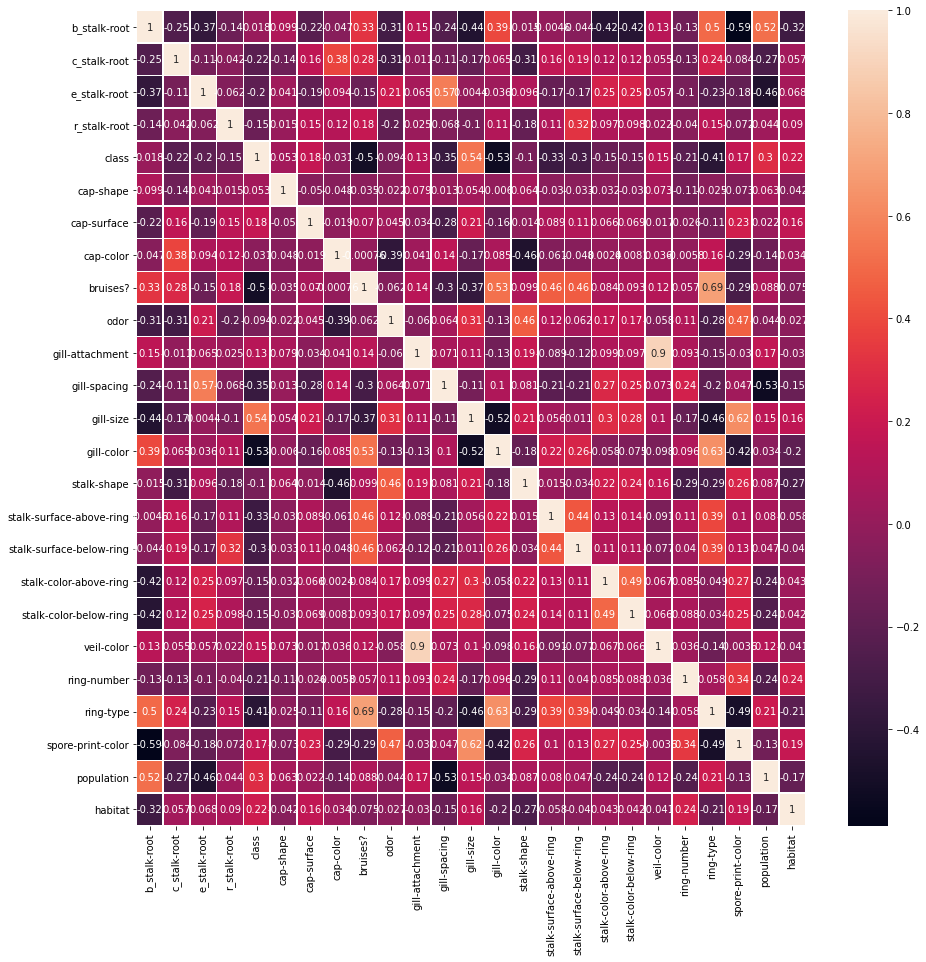

In [0]:
import seaborn as sns
coo = encoded_data.corr('pearson')
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(coo, annot=True, linewidths=.5, ax=ax)

in heatmap values closer to 1 are more correlated.

Here pearson correlation is done to get correlation between target and features

In [0]:
encoded_data.corr("pearson")["class"]

b_stalk-root                0.017712
c_stalk-root               -0.218548
e_stalk-root               -0.202839
r_stalk-root               -0.150087
class                       1.000000
cap-shape                   0.052951
cap-surface                 0.178446
cap-color                  -0.031384
bruises?                   -0.501530
odor                       -0.093552
gill-attachment             0.129200
gill-spacing               -0.348387
gill-size                   0.540024
gill-color                 -0.530566
stalk-shape                -0.102019
stalk-surface-above-ring   -0.334593
stalk-surface-below-ring   -0.298801
stalk-color-above-ring     -0.154003
stalk-color-below-ring     -0.146730
veil-color                  0.145142
ring-number                -0.214366
ring-type                  -0.411771
spore-print-color           0.171961
population                  0.298686
habitat                     0.217179
Name: class, dtype: float64

gill-size and gill-color features have highest correlation of 0.54 and 0.53 respectively.

Here Iam taking 1 variable i.e gill-color as x1 and target(class) as y.

In [0]:
x1=encoded_data["gill-color"].values
y=encoded_data["class"].values

ploting gill-color vs target("class")

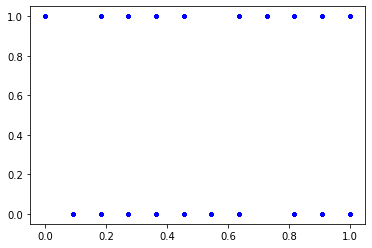

In [0]:
plt.plot(x1,y,'b.')

sigmoid function

A sigmoid function is a mathematical function having a characteristic "S"-shaped curve.

A sigmoid function is a type of activation function, and more specifically defined as a squashing function. Squashing functions limit the output to a range between 0 and 1, making these functions useful in the prediction of probabilities.

![alt text](https://drive.google.com/uc?id=1uEnBwHpkWKHhXztbYzxzuAIs07JO9DBl)

In [0]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

**error function** 

calculates error using the cost function shown below

![alt text](https://drive.google.com/uc?id=1bUtEr43lhwVmefLqRmMQLTHIbwpv-u_6)

this cost function can be written in this form

![alt text](https://drive.google.com/uc?id=1jHbRPcNu4f8csi8qDGTN78IKYlzlw7r4)

In [0]:
def error(a,b,x1,y):
  error = 0
  m = len(y)
  for i in range(m):
      f=(a*x1[i]+b)
      error += -y[i] * np.log(sigmoid(f)) - (1-y[i]) * np.log(1-sigmoid(f))
  return error/m

step gradient function reduces the error by going towards minima in steps this is done by analising the slope in each step.

In [0]:
def step_gradient(a,b,x1,y,learning_rate):
    grad_a = 0
    grad_b = 0
    m = len(y)
    for i in range(m):
      f=(a*x1[i]+b)
      grad_a += (sigmoid(f) - y[i]) * x1[i]
      grad_b += (sigmoid(f) - y[i])        
    a = a - (grad_a * learning_rate)
    b = b - (grad_b * learning_rate)
    return a,b

descend function performs gradient descent

In [0]:

def descend(initial_a, initial_b, x1, y, learning_rate, iterations):
    a, b = initial_a, initial_b
    for i in range(iterations):
        e = error(a, b, x1, y)
        if i % 100 == 0:
            print(f"Error: {e}, a: {a}, b: {b}")
        a,b = step_gradient(a, b, x1, y, learning_rate)
        
    return a,b

accuracy function determines the accuracy of the model by determining the score no. of times the model has predicted correctly by using a boundary as 0.5.

In [0]:
def accuracy(a,b,x1,y):
    correct = 0
    for i in range(len(y)):
        f=(a*x1[i]+b)
        prediction = sigmoid(f)
        if prediction > 0.5:
            z = 1
        else:
            z = 0
        if y[i] == z:
            correct += 1
            
    print("Accuracy: {}".format(correct / len(y)))

splitting values into train and test dataset using train_test_split

In [0]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, y_train, y_test = train_test_split(x1,y,test_size=0.2)


**Training**

inititialising variables and calling descend function which trains the model using logistic regression.

In [0]:
learning_rate = 0.001
iterations = 1000
a,b=0,0
final_a, final_b = descend(a, b, x1_train, y_train, learning_rate, iterations)

Error: 0.6931471805600207, a: 0, b: 0
Error: 0.5381536328508785, a: -4.03170934620946, b: 1.6681146348094296
Error: 0.5381536271262821, a: -4.032609006048566, b: 1.6685214243379458
Error: 0.5381536271262588, a: -4.0326093286757585, b: 1.6685215702163638
Error: 0.5381536271262359, a: -4.032609328791472, b: 1.6685215702686842
Error: 0.5381536271262357, a: -4.032609328791508, b: 1.6685215702687006
Error: 0.5381536271262357, a: -4.032609328791508, b: 1.6685215702687006
Error: 0.5381536271262357, a: -4.032609328791508, b: 1.6685215702687006
Error: 0.5381536271262357, a: -4.032609328791508, b: 1.6685215702687006
Error: 0.5381536271262357, a: -4.032609328791508, b: 1.6685215702687006


plotting the sigmoid curve to see whether the curve is fitted into the data or not

(0.0, 1.0)

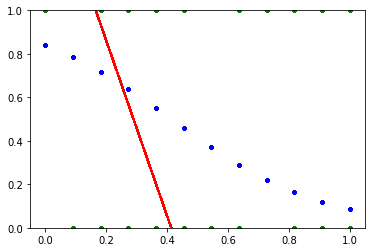

In [0]:
f = (final_a * x1_train + final_b)
plt.plot(x1_train, y_train, 'g.',     #data
         x1_train, sigmoid(f), 'b.',  #sigmoid curve
         x1_train, f, 'r',)           # the line
plt.ylim(0,1)

from this plot we can infer that sigmoid curve is not fitted properly but has done to some extent.
this means that logistic regression model has not been able to predict the result well which can be seen in the accuracy as well.

In [0]:
accuracy(final_a,final_b, x1_train, y_train)

Accuracy: 0.7568856747191876


In [0]:
accuracy(final_a,final_b, x1_test, y_test)

Accuracy: 0.7513846153846154


Logistic Regression model was able to predict whether the mushroom is edible or poisonous with a accuracy of 75% only. 

# kNN

The k-nearest neighbors (KNN) algorithm is a simple, easy-to-implement supervised machine learning algorithm that can be used to solve both classification and regression problems.

The KNN algorithm assumes that similar things exist in close proximity.

'k' in KNN is a parameter that refers to the number of nearest neighbours to include in the majority of the voting process

![alt text](https://drive.google.com/uc?id=1XLnhNr92Ff5gb6ZXfOMKJHKDbBB5bvG5)

Functions used in KNN

In [0]:
# Calculate Distance between any two given points
#  the Euclidean distance or Euclidean metric is the "ordinary" straight-line distance between two points in Euclidean space.

def euclid_distance(train_point, given_point):
    distance = np.sum((train_point-given_point)**2)
    return np.sqrt(distance)


# this function calculates distance with respect to all the points.
# this is the drawback of KNN as calculating distance w.r.t all points is not feasable in huge data.
# Hence KNN is usually used for small datasets
def calc_distance_from_all(all_points, given_point, predictions):
    all_distances = []
    for i, each in enumerate(all_points):
        distance = euclid_distance(each, given_point)
        all_distances.append((distance,int(predictions[i])))
    all_distances.sort(key=lambda mytup: mytup[0])
    return all_distances


#depending on the distances it takes the neighbours
def get_neighbours(distances, count):
    return distances[:count]

# Takes a given point and predicts the class based on all other points
def predict(all_points, given_point, predictions):
    distances = calc_distance_from_all(all_points,given_point,predictions)
    neighbours = get_neighbours(distances, 3)
    op = [row[-1] for row in neighbours]
    prediction = max(op, key=op.count)
    return prediction



# Get how accurate our system is based on a new set of test points
# for which we already know the right answer to
def accuracy(basex, basey, testx, testy):
    correct = 0 
    
    for i in range(len(testx)):
        p = predict(basex, testx[i], basey)
        if p == testy[i]:
            correct += 1
            
    return f"Accuracy: {correct*100/len(testy)}%"

taking 2 features gill-size and gill-color as correlation of these 2 features is high.

In [0]:
X=encoded_data[["gill-size","gill-color"]].values
Y=encoded_data[["class"]].values

splitting values into train and test dataset using train_test_split

In [0]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size=0.3)

In [0]:
ytest[2]

array([0.])

In [0]:
predict(xtrain, xtest[2], ytrain)

0

model predicts correct class i.e class 0 

In [0]:
accuracy(xtrain, ytrain, xtest, ytest)

'Accuracy: 78.5890073831009%'

KNN model predicts that mushroom edible or poisonous with an accuracy of 82%. 

# Conclusion

Accuracy:

    Nueral Network             98.15 %

    Logistic regression        75.7 %

    kNN                        78.5 %

Hence the model predicts weather the mushroom is edible or poisonous with an accuracy of 97% using Nueral Network.

This model can save your life..!!